In [179]:
#Import numpy and pandas 
import numpy as np
import pandas as pd

In [180]:
#Import visualization libraries and set %matplotlib inline.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [181]:
#Read in the csv file as a dataframe called df and also add datetime as index
df = pd.read_csv("mydata.csv",parse_dates=['datetime'], index_col=['datetime'])

In [182]:
#Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3768 entries, 2020-05-12 10:10:25 to 2020-09-03 08:48:01
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   interaction       3768 non-null   object 
 1   direction         3768 non-null   object 
 2   correspondent_id  3768 non-null   object 
 3   call_duration     1424 non-null   float64
 4   antenna_id        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 176.6+ KB


In [183]:
#Add a new column called Week and drop antenna_id column
df['week']= df.index.map(lambda observation_timestamp:observation_timestamp.week)
df.drop(['antenna_id'], axis=1, inplace=True)

In [184]:
#Check the head of df
df.head(10)

,interaction,direction,correspondent_id,call_duration,week
datetime,,,,,
2020-05-12 10:10:25,call,out,+10794042676,51.0,20
2020-05-12 10:19:35,call,in,+10794042676,12.0,20
2020-05-12 10:20:14,call,out,+10794042676,84.0,20
2020-05-12 10:21:43,call,out,+10794042676,NaN,20
2020-05-12 10:23:21,text,in,MPESA,NaN,20
2020-05-12 10:23:37,text,in,KCB MPESA,NaN,20
2020-05-12 10:23:42,text,in,KCB MPESA,NaN,20
2020-05-12 10:25:41,text,in,MPESA,NaN,20
2020-05-12 10:27:12,text,in,MPESA,NaN,20


In [185]:
#Top 10 interaction contacts.
df['correspondent_id'].value_counts().head(10)

+10794042676     597
Telkom           423
MPESA            393
Safaricom        333
+10790829662     134
+10701892862     121
+254794042676    103
SAFARICOM         89
+10772655507      86
+120422           81
Name: correspondent_id, dtype: int64

In [186]:
df['correspondent_id'].nunique()

255

In [187]:
call_count = df[df["interaction"] == 'call']
call_count['interaction'].value_counts()

call    2000
Name: interaction, dtype: int64

In [188]:
text_count = df[df["interaction"] == 'text']
text_count['interaction'].value_counts()

text    1768
Name: interaction, dtype: int64

In [189]:
df['direction'].value_counts()

in     2478
out    1290
Name: direction, dtype: int64

In [190]:
byWeek = df.groupby('week').count()
byWeek.head()

,interaction,direction,correspondent_id,call_duration
week,,,,
20,173,173,173,69
21,157,157,157,56
22,225,225,225,85
23,203,203,203,53
24,223,223,223,65


<AxesSubplot:xlabel='week'>

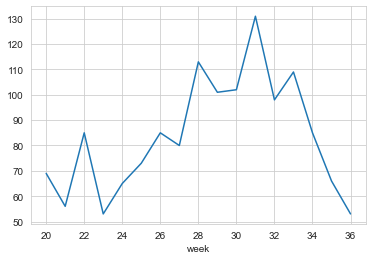

In [196]:
byWeek['call_duration'].plot()

<AxesSubplot:xlabel='week'>

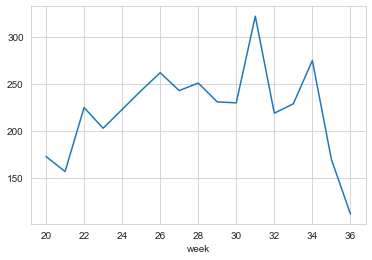

In [195]:
byWeek['interaction'].plot()

<AxesSubplot:xlabel='week'>

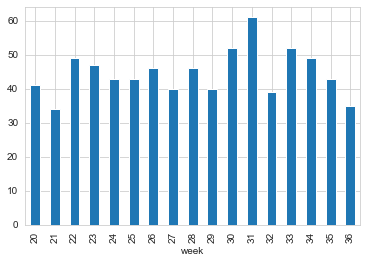

In [192]:
df.groupby('week')['correspondent_id'].nunique().plot(kind='bar')

<AxesSubplot:xlabel='interaction', ylabel='count'>

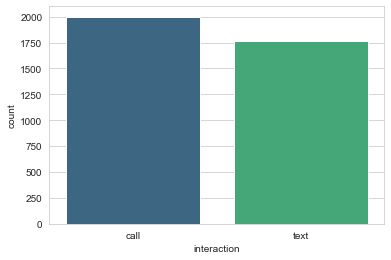

In [193]:
sns.countplot(x='interaction',data=df,palette='viridis')

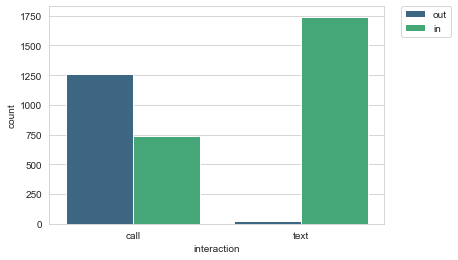

In [194]:
sns.countplot(x='interaction',data=df,hue='direction',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)